# EDA 

In this EDA, we are focus on analyzing the main question of either the passengers surviving or dying during the plane crashes.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
sns.set(style="white")

In [4]:
df = pd.read_pickle('../Aircrashesh-cleaned.pkl')
df_summary = pd.read_pickle('../Summary_token_word.pkl')

In [5]:
df.columns.values

array(['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration',
       'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'Survive_Prob', 'Hours', 'State_Countries', 'Source', 'Destination',
       'Plane_Name', 'Passenger_Military'], dtype=object)

In [6]:
# Dropping the unnecessary columns
df.drop(['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration','cn/In','Summary'],axis=1,inplace=True)

## Overview on the Data

In [7]:
hm_1958_2008 = pd.DataFrame(index=range(1958,2009),columns=range(1,13))

In [8]:
def total_crash_monthly(df_,month,year):
    return df_['{}-{}'.format(year,month)].Fatalities.sum()

In [9]:
for year in tqdm(range(1958,2009)):
    for month in range(1,13):
        hm_1958_2008.loc[year,month] = total_crash_monthly(df,month,year)

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 85.63it/s]


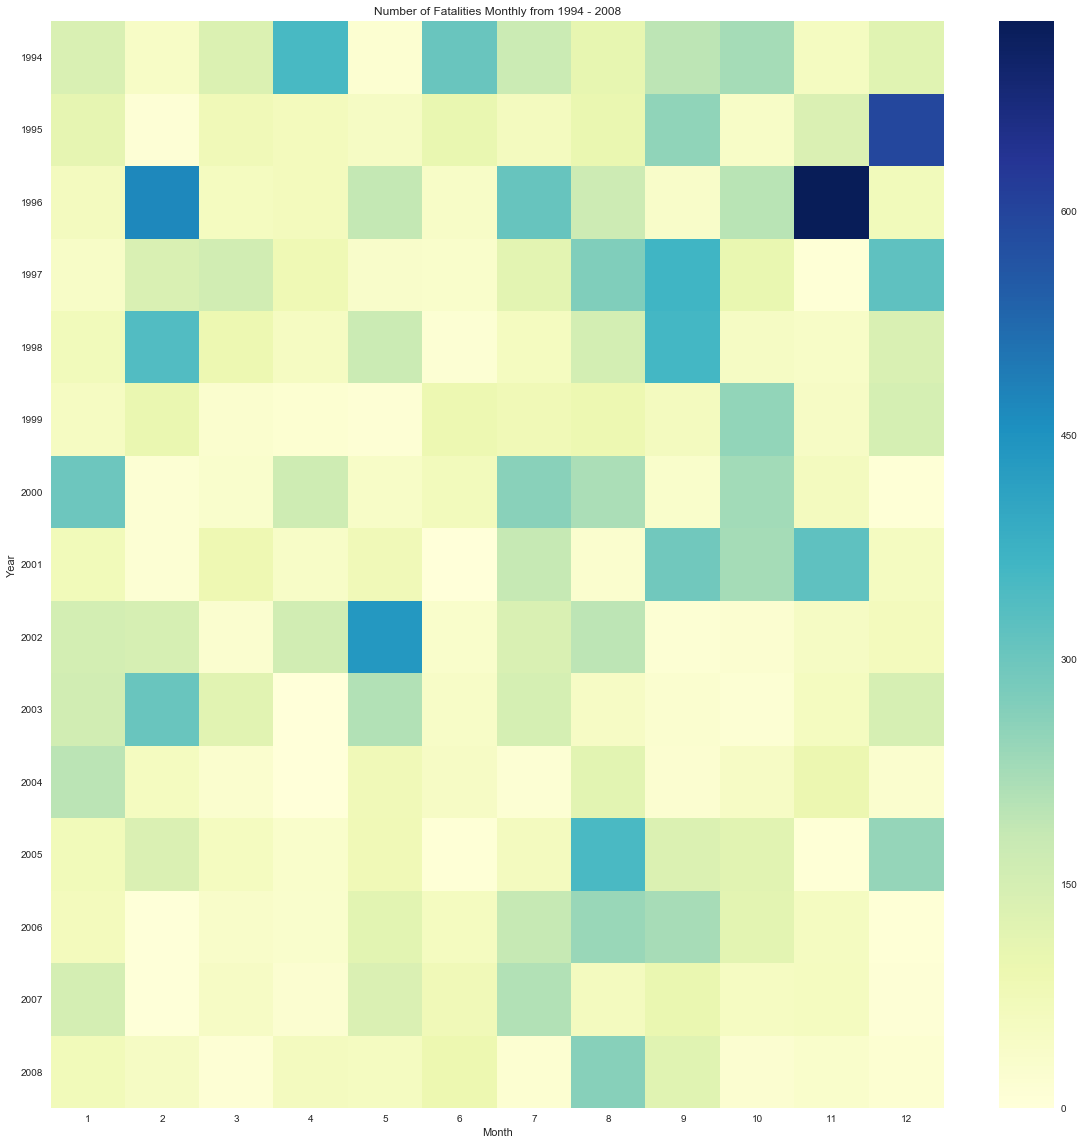

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(hm_1958_2008.iloc[-15:].astype(float),cmap="YlGnBu",ax=ax)
plt.yticks(rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_title('Number of Fatalities Monthly from 1994 - 2008')

In [11]:
df_selected = df[['Aboard','Fatalities']]

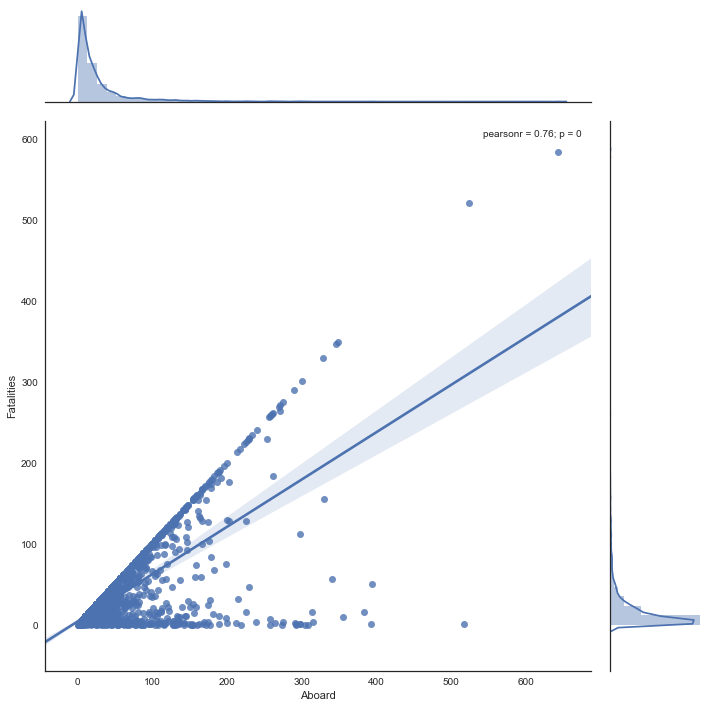

In [12]:
sns.jointplot("Aboard", "Fatalities", data=df_selected, kind="reg",size=10)

As expected the aboard and fatalities are quite linear dependent to each othe with the pearsonr correlation value of 0.76.

#### Places where plane most crash

In [13]:
df.State_Countries.value_counts(ascending=False).head(10)

Brazil        180
Alaska        174
Russia        170
Colombia      146
California    138
France        124
India          95
England        85
Mexico         82
Indonesia      82
Name: State_Countries, dtype: int64

#### Time where plane most crash


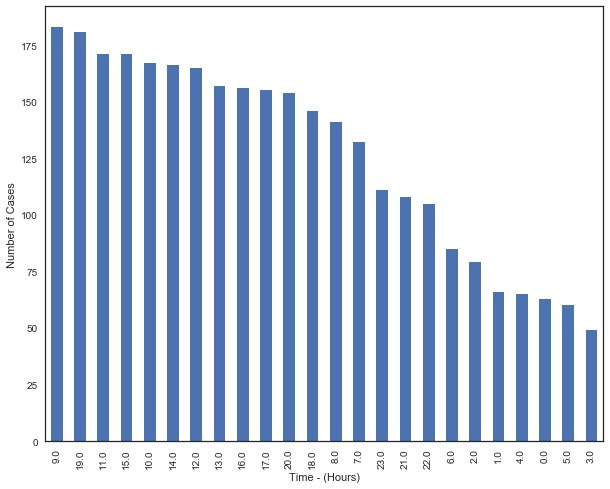

In [14]:
df.Hours.value_counts().plot(kind='bar',figsize=(10,8))
plt.xlabel('Time - (Hours)')
plt.ylabel('Number of Cases')

### Top 10 Worst Planes Excluding Military

In [15]:
df.loc[df.Passenger_Military == 1,'Plane_Name'].value_counts().head(10)

Douglas       802
Boeing        309
Cessna        287
De            275
Antonov       189
Lockheed      177
Piper         128
Mcdonnell     123
Curtiss       119
Beechcraft    116
Name: Plane_Name, dtype: int64

In [16]:
df.Source.value_counts().head(10)

Training         81
New York City    35
Sightseeing      29
Rome             28
Chicago          26
Paris            26
London           26
Bogota           26
Moscow           24
Sao Paulo        20
Name: Source, dtype: int64

### Probability of Surviving a Plane Crash

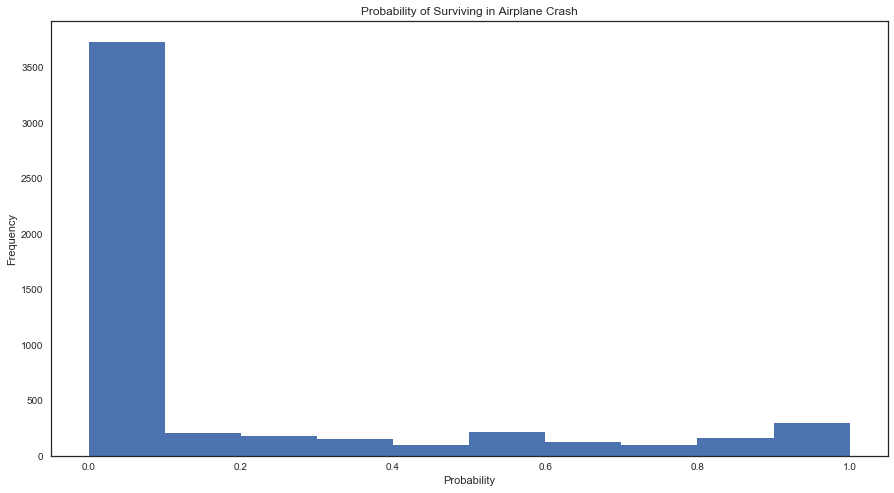

In [17]:
df.Survive_Prob.plot.hist(figsize=(15,8))
plt.xlabel('Probability')
plt.title('Probability of Surviving in Airplane Crash')

In [18]:
# Probability of Alived Confirm !
len(df.Survive_Prob[df.Survive_Prob == 1])/df.shape[0]

0.010630220197418374

In [19]:
# Probability of Dead Confirm !
len(df.Survive_Prob[df.Survive_Prob == 0])/df.shape[0]

0.6666666666666666

In [20]:
# Probability of alived > 0.5
len(df.Survive_Prob[df.Survive_Prob >= 0.5])/df.shape[0]

0.16913439635535307

In [21]:
# Probability of Surviving
len(df.Survive_Prob[df.Survive_Prob > 0])/df.shape[0]

0.3287775246772969

In [22]:
df.Survive_Prob.value_counts().sort_index().head(3)

0.000000    3512
0.006098       1
0.006452       1
Name: Survive_Prob, dtype: int64

From here we can see that the probabilty of you surviving miraculously (even as low as 0.006) in a plane crash is 33%. There are only 1% you are surely to be alive and 17% chances that you have a probablity of more than 50% to be alived. As expected if the plane you are riding is crashing you has a 67% of chances of dying. Since we are trying to determine whether we are going to be alived or not lets make another label for survive status. Note that in the survive status label, the passenger has the probability of 67% of dying (__0__) and 33% of living (__1__).

In [23]:
df['Survive_Status'] = np.nan

In [24]:
df.loc[df.Survive_Prob > 0,'Survive_Status'] = 1 # Alive
df.loc[df.Survive_Prob == 0,'Survive_Status'] = 0 # Dead

In [25]:
df_survived = df[df.Survive_Status == 1]
df_dead = df[df.Survive_Status == 0]

### Time / Aboard / Survive Status

In [26]:
df_selected = df[['Hours','Survive_Status','Aboard']]

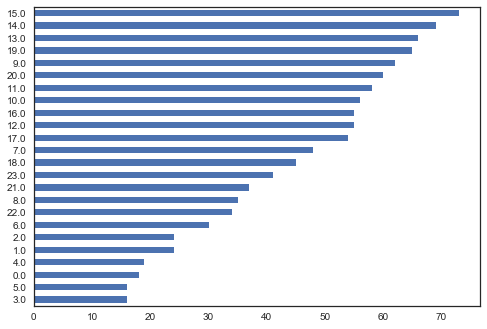

In [46]:
df_survived.Hours.value_counts(ascending=True).plot(kind='barh')

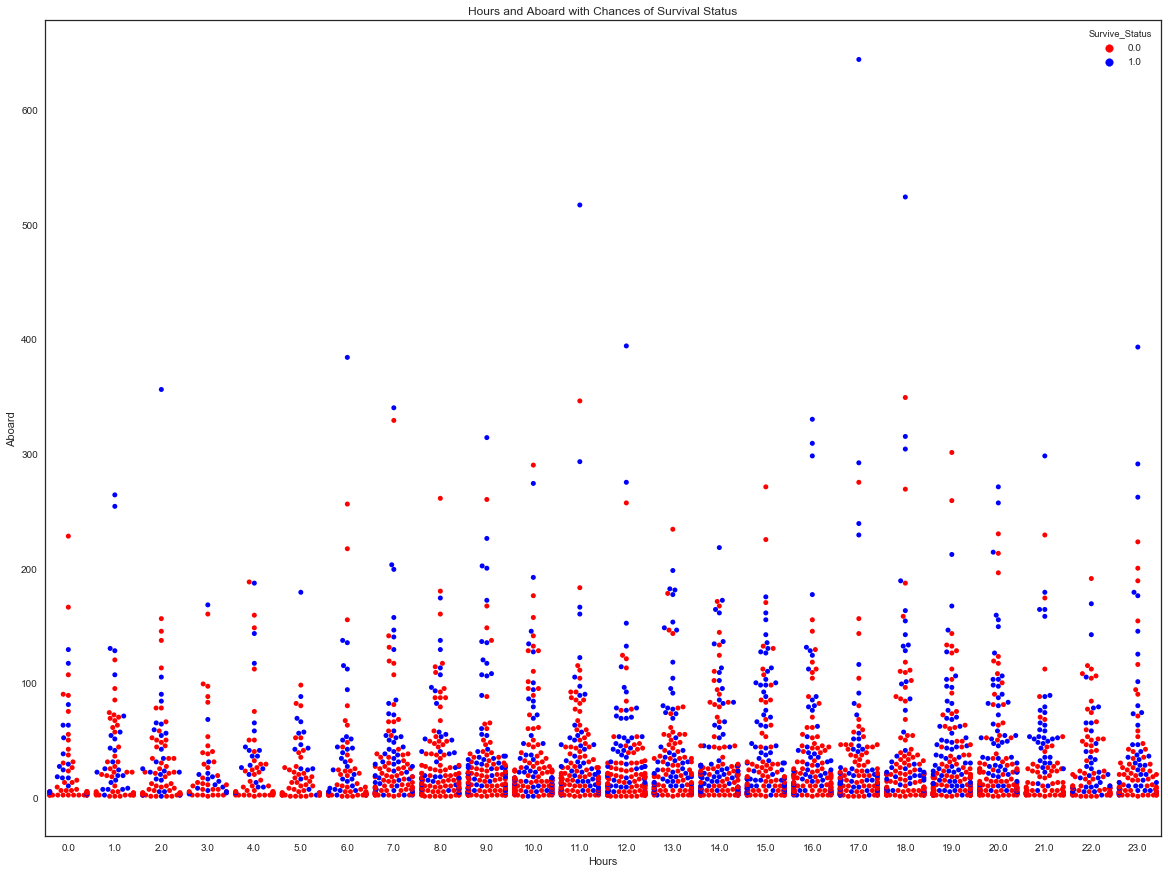

In [28]:
fig , ax = plt.subplots(figsize=(20,15))
sns.swarmplot(df_selected.Hours,df_selected.Aboard,hue=df_selected.Survive_Status,palette={0:'red',1:'blue'},ax=ax)
ax.set_title('Hours and Aboard with Chances of Survival Status')

This swarm plot shows that the chances that your are likely to survive if the plane for anytime if the people aboard is many therea are a chance for you to survive. As we can see for an given time there are many red dot placed at less than 100.

#### Survive Table Best by Frequency Top 5 of all features

| Plane Name        | Source           | Destination  |
| ------------- |:-------------:| -----:|
| Douglas     | New York | New York |
| Boeing      | Paris     |  Sightseeing |
| De | Rome     |   Paris |  
|Lockheed | Sightseeing | Manila |
|Antonov  | Manila | Los Angeles


In [29]:
df_survived.Plane_Name.value_counts().head(10)

Douglas      338
Boeing       157
De           108
Lockheed      92
Antonov       76
Mcdonnell     66
Fokker        62
Cessna        58
Convair       48
Curtiss       38
Name: Plane_Name, dtype: int64

In [30]:
df_survived.Source.value_counts().head(10)

New York City    20
Paris            13
Rome             13
Sightseeing      12
Manila           12
Chicago          10
Sao Paulo        10
Bangkok           9
Training          9
Miami             9
Name: Source, dtype: int64

In [31]:
df_survived.Destination.value_counts().head(10)

New York City    12
Sightseeing      12
Paris            11
Manila            9
Los Angeles       9
Rome              9
Training          9
London            8
Miami             8
Cairo             7
Name: Destination, dtype: int64

In [32]:
index_survive = df_survived.index

In [33]:
word_summary = []

In [34]:
for ix in tqdm(index_survive):
    try:
        size_ = len(df_summary[ix])
        for i in range(size_):
            word_summary.append(df_summary[ix].iloc[i])
    except:
        pass

100%|█████████████████████████████████████████████████████████████████████████████| 1732/1732 [00:16<00:00, 102.46it/s]


In [35]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [36]:
empty_list = []

In [37]:
for i in word_summary:
    if isinstance(i,list):
        for i_ in i:
            empty_list.append(i_)
    else:
        empty_list.append(i)

In [38]:
survived_dict = Counter(empty_list).most_common()

In [39]:
index_dead = df_dead.index

In [40]:
word_summary = []

In [41]:
for ix in tqdm(index_dead):
    try:
        size_ = len(df_summary[ix])
        for i in range(size_):
            word_summary.append(df_summary[ix].iloc[i])
    except:
        pass

100%|█████████████████████████████████████████████████████████████████████████████| 3512/3512 [00:26<00:00, 132.45it/s]


In [42]:
empty_list =[]
for i in word_summary:
    if isinstance(i,list):
        for i_ in i:
            empty_list.append(i_)
    else:
        empty_list.append(i)

In [43]:
failed_dict = Counter(empty_list).most_common()

In [65]:
survive_top_10_summary = []

for i in range(10):
    survive_top_10_summary.append(survived_dict[i][0])

In [66]:
dead_top_10_summary = []

for i in range(10):
    dead_top_10_summary.append(failed_dict[i][0])

In [71]:
set(survive_top_10_summary).intersection(set(dead_top_10_summary))

{'aircraft',
 'approach',
 'crashed',
 'crew',
 'engine',
 'failure',
 'pilot',
 'plane'}

In [75]:
set(survive_top_10_summary) - set(dead_top_10_summary)

{'landing', 'runway'}

In [76]:
set(dead_top_10_summary) - set(survive_top_10_summary)

{'flight', 'mountain'}

From the summary word itself we can see the cause of the crash usually is because of engine failure aand also related to the pilots and crews. For Survive, as expected the plane managed to land the plane or the plane is at the runway just before the take off. Interestingly, we can see the word mountain for plane crash where no one survived. Maybe it is something that is worth to be analyze on.

In [44]:
df.to_pickle('../aircrash-analysis.pkl')